### Predicting employee retention
Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as average salary during her tenure, department, and years of experience.
The goal is to predict employee retention and understand its main drivers

What are the main factors that drive employee churn? Do they make sense? Explain your findings.
    - I found that length of tenure was the biggest factor in employee churn. Employees left after 1 or 2 years in a position (predominantly). This makes sense as 1 year is considered long enough to not raise concerns that you might not stick out a position. Addiotnally, a year might be long enough to get the desired experience from the position. Furthermore, tie period like 1, 2 years are oftern when people reflect on their current and furture career options 

What might you be able to do for the company to address employee Churn, what would be follow-up actions?
    - Consider incentives for staying beyond 1 or 2 years, maybe a bonus ater 2 years?

If you could add to this data set just one variable that could help explain employee churn, what would that be?
     - Employee satisfaction. And/or performance reviews


In [459]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble.forest import _generate_unsampled_indices


In [460]:
df = pd.read_csv('employee_retention.csv', index_col = 0)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18


In [461]:
df.shape

(34702, 7)

In [462]:
df.describe(include='all')

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,3.470200e+04,34702.000000,34702,34702.000000,34463.000000,34702,23510
unique,NaN,NaN,7,NaN,NaN,3124,2008
top,NaN,NaN,temp_contractor,NaN,NaN,2011-11-28,2015-05-08
freq,NaN,NaN,10000,NaN,NaN,76,111
mean,6.466667e+05,4.023370,NaN,10.056625,100280.585004,NaN,NaN
std,3.337653e+05,2.911201,NaN,9.355505,87322.502536,NaN,NaN
min,3.600000e+01,1.000000,NaN,0.000000,5000.000000,NaN,NaN
25%,3.529228e+05,1.000000,NaN,0.000000,9302.000000,NaN,NaN
50%,7.063230e+05,3.000000,NaN,8.000000,88000.000000,NaN,NaN
75%,1.001324e+06,6.000000,NaN,18.000000,158000.000000,NaN,NaN


In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34702 entries, 0 to 34701
Data columns (total 7 columns):
employee_id    34702 non-null float64
company_id     34702 non-null int64
dept           34702 non-null object
seniority      34702 non-null int64
salary         34463 non-null float64
join_date      34702 non-null object
quit_date      23510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


In [464]:
df.head(17)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,05.17.2011,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaN
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28
7,702479.0,7,data_science,7,140000.0,12.27.2011,2013-08-30
8,545690.0,10,data_science,16,238000.0,12.23.2013,NaN
9,622587.0,5,sales,28,166000.0,2015-07-01,NaN


In [465]:
df['join_date'] = pd.to_datetime(df['join_date'])
df.head(17)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaN
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28
7,702479.0,7,data_science,7,140000.0,2011-12-27,2013-08-30
8,545690.0,10,data_science,16,238000.0,2013-12-23,NaN
9,622587.0,5,sales,28,166000.0,2015-07-01,NaN


In [466]:
df['quit_date'] = pd.to_datetime(df['quit_date'], errors='coerce')
df.head(17)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaT
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28
7,702479.0,7,data_science,7,140000.0,2011-12-27,2013-08-30
8,545690.0,10,data_science,16,238000.0,2013-12-23,NaT
9,622587.0,5,sales,28,166000.0,2015-07-01,NaT


In [467]:
def days_employed(x):
    xx = pd.to_datetime('2015-12-13')
    
    if x['quit_date'] is NaT:
        return (xx - x['join_date']).days
    else:
        return (x['quit_date'] - x['join_date']).days

In [468]:
df['days_employed'] = df.apply(days_employed, axis=1) 

In [469]:
df.head(15)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days_employed
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,90
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,1110
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,662
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,90
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaT,531
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,634
7,702479.0,7,data_science,7,140000.0,2011-12-27,2013-08-30,612
8,545690.0,10,data_science,16,238000.0,2013-12-23,NaT,720
9,622587.0,5,sales,28,166000.0,2015-07-01,NaT,165


In [470]:
#create employed still column
df['employed'] = df['quit_date'].isnull().astype(int)
df.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days_employed,employed
0,1001444.0,8,temp_contractor,0,5850.0,2008-01-26,2008-04-25,90,0
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304,0
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,1110,0
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,662,0
4,1006393.0,1,temp_contractor,0,8509.0,2008-07-20,2008-10-18,90,0
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaT,531,1
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,634,0
7,702479.0,7,data_science,7,140000.0,2011-12-27,2013-08-30,612,0
8,545690.0,10,data_science,16,238000.0,2013-12-23,NaT,720,1
9,622587.0,5,sales,28,166000.0,2015-07-01,NaT,165,1


In [471]:
#remove temp contractors as we expect them to churn, we are not trying to retain them
df_ft = df[df['dept']!= 'temp_contractor']
print(df_ft.shape)
df_ft.head()

(24702, 9)


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days_employed,employed
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304,0
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,1110,0
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,662,0
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaT,531,1
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,634,0


In [472]:
#remove errors in seniority
df_ft =df_ft[df_ft['seniority']< 90]

In [473]:
#make sure that the start dates are within the dates that we have been told we have data for

print('Earliest join date is: ', min(df_ft['join_date']))
print('Last join date is: ', max(df_ft['join_date']))

Earliest join date is:  2011-01-24 00:00:00
Last join date is:  2015-12-10 00:00:00


In [474]:
df_ft.groupby('employed').mean()

,employee_id,company_id,seniority,salary,days_employed
employed,,,,,
0,502061.874889,3.459209,14.118967,135713.089631,613.430560
1,501079.237759,3.387688,14.123392,141192.259112,527.039224


#### We can see just from a very basic overview that the employees that remain seem to recieve a higher salary than the employees that left

In [475]:
df_ft.groupby(['dept','employed']).mean()['salary']

dept              employed
customer_service  0            84302.795955
                  1            79637.419674
data_science      0           199623.571858
                  1           215282.463186
design            0           139637.662338
                  1           134219.430486
engineer          0           199013.259196
                  1           212388.340807
marketing         0           136856.090652
                  1           133976.591075
sales             0           135681.868743
                  1           136465.925926
Name: salary, dtype: float64

#### When we break the numers down a little more we can see that actually remaining employees are only paid more than the employees who left in the Data Science, Engineering, and Sales depts 

In [476]:
df_ft.groupby(['dept','employed']).mean()['days_employed']

dept              employed
customer_service  0           602.242638
                  1           510.813754
data_science      0           650.760999
                  1           557.329576
design            0           602.813625
                  1           535.117940
engineer          0           649.129606
                  1           553.454909
marketing         0           600.704826
                  1           506.236272
sales             0           580.770845
                  1           516.080823
Name: days_employed, dtype: float64

### There doesn't seem to be huge descepanicy in the length of time employed between departments. If anything, the sales department might have slightly higher churn than other departments. engineering and Data Science departments seem to have longer employee retention

In [477]:
df_ft.describe()

,employee_id,company_id,seniority,salary,days_employed,employed
count,24700.000000,24700.000000,24700.000000,24461.000000,24700.000000,24700.000000
mean,501616.624899,3.426802,14.120972,138195.862802,574.285142,0.453117
std,288908.533280,2.699752,8.054137,76058.515210,361.585465,0.497807
min,36.000000,1.000000,1.000000,17000.000000,3.000000,0.000000
25%,250165.250000,1.000000,7.000000,79000.000000,333.000000,0.000000
50%,500793.000000,2.000000,14.000000,123000.000000,424.000000,0.000000
75%,753142.250000,5.000000,21.000000,187000.000000,781.000000,1.000000
max,999969.000000,12.000000,29.000000,408000.000000,1777.000000,1.000000


In [478]:
def cat_days(x):
    if x < 183:
        return 6
    if x >= 183 and x < 366:
        return 12
    if x >= 366 and x < 548:
        return 18
    if x >= 548 and x < 730:
        return 24
    if x >= 730 and x < 1096:
        return 36
    else:
        return 37

def cat_salary(x):
    if x <=20000:
        return 20
    if x > 20000 and x <=50000:
        return 50
    if x > 50000 and x <=100000:
        return 100
    if x > 100000 and x <=150000:
        return 150
    if x > 150000 and x <=200000:
        return 200
    if x > 200000 and x <=250000:
        return 250
    else:
        return 251


In [479]:
#df_ft['period_cat'] = df_ft['days_employed'].apply(cat_days)
df_ft['salary_cat'] = df_ft['salary'].apply(cat_salary)
df_ft['months_employed'] = np.round(df_ft['days_employed']/30)
df_ft.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days_employed,employed,salary_cat,months_employed
1,388804.0,8,design,21,191000.0,2011-05-17,2012-03-16,304,0,200,10.0
2,407990.0,3,design,9,90000.0,2012-03-26,2015-04-10,1110,0,100,37.0
3,120657.0,2,engineer,20,298000.0,2013-04-08,2015-01-30,662,0,251,22.0
5,287530.0,5,marketing,20,180000.0,2014-06-30,NaT,531,1,200,18.0
6,561043.0,3,customer_service,18,119000.0,2012-07-02,2014-03-28,634,0,150,21.0


<function matplotlib.pyplot.show(*args, **kw)>

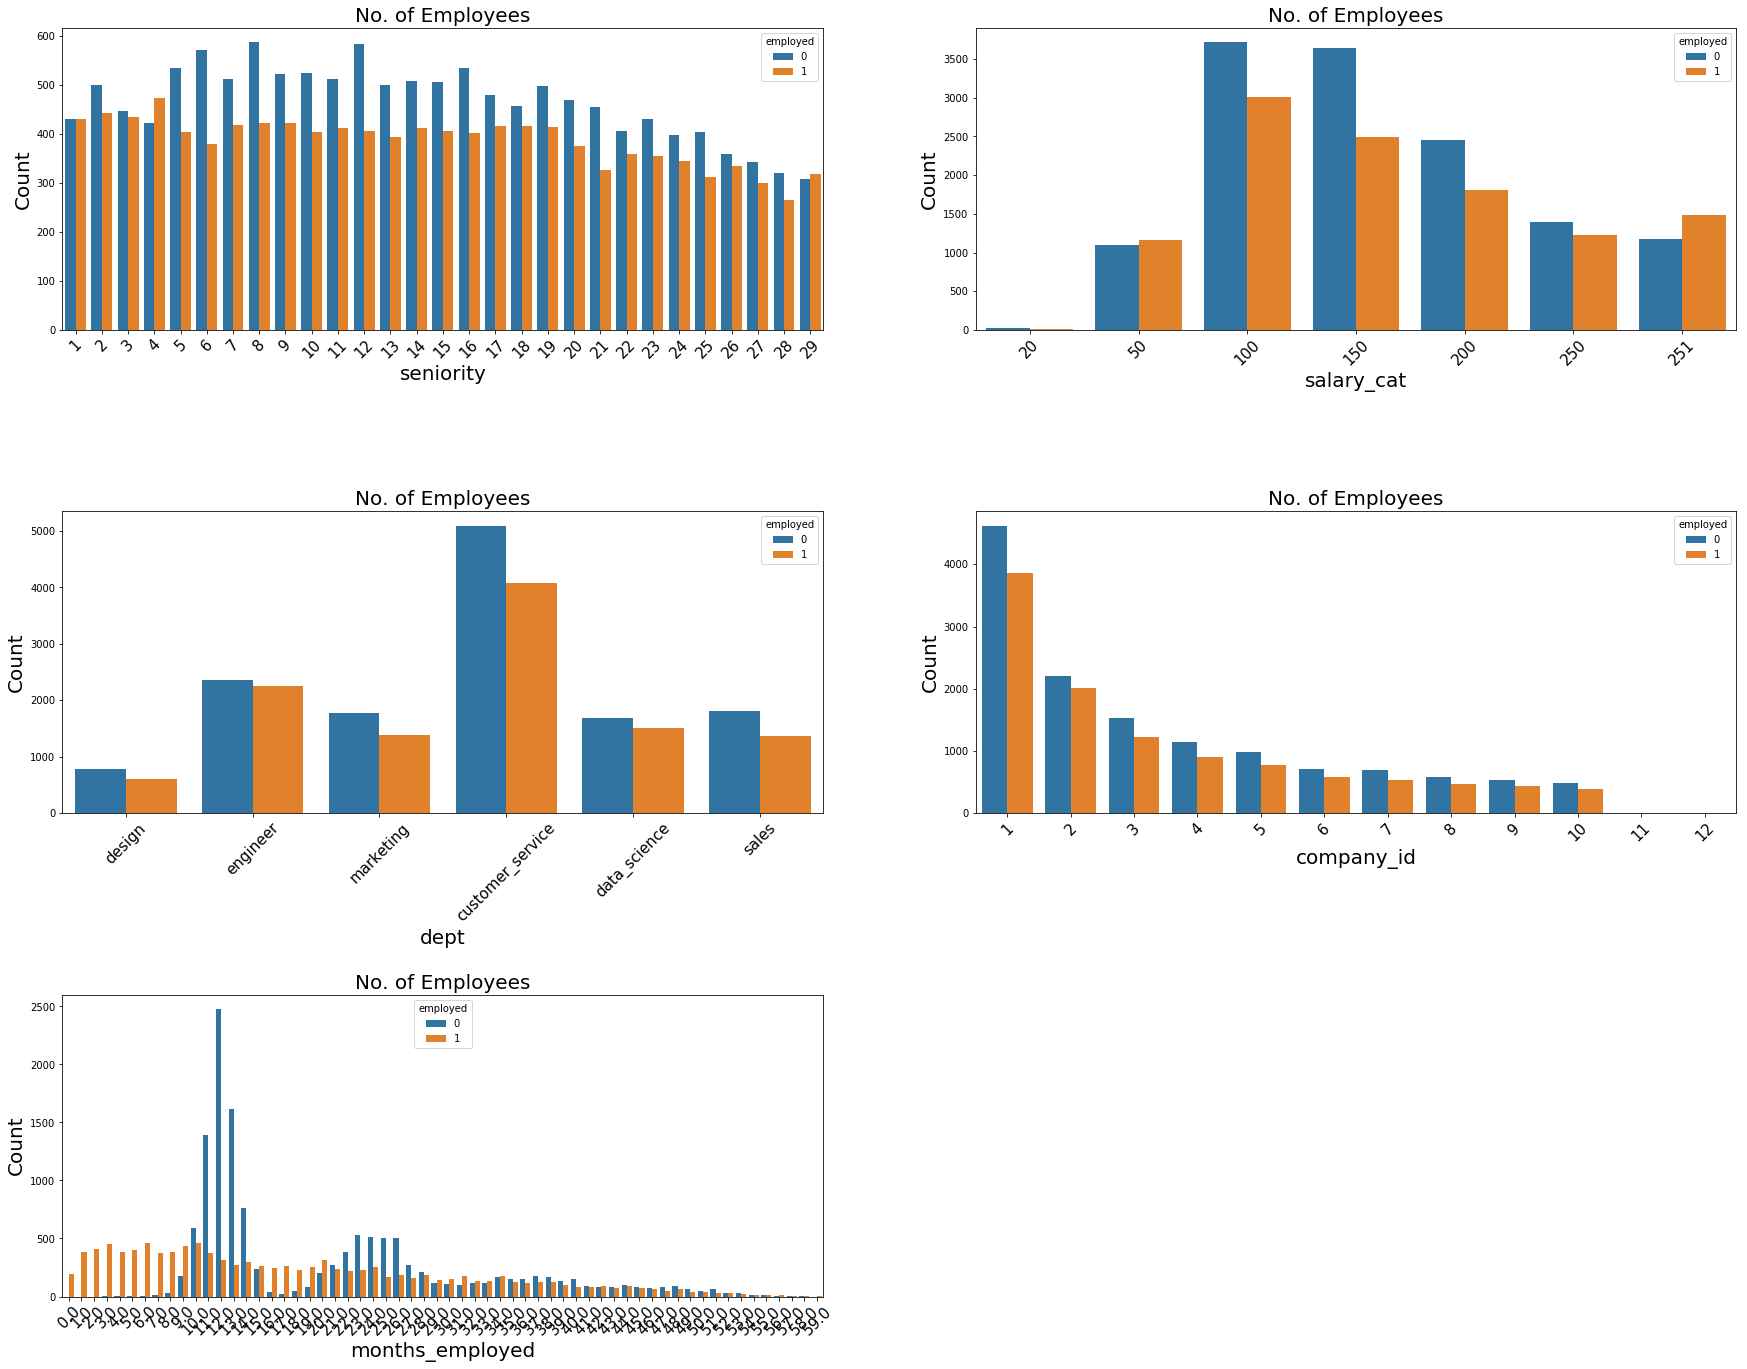

In [480]:
features=['seniority','salary_cat','dept','company_id','months_employed']
fig=plt.subplots(figsize=(30,50))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 0.6)
    sns.countplot(x=j,data = df_ft, hue='employed')
    plt.xticks(rotation=45, fontsize=15)
    plt.xlabel(j, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title("No. of Employees", fontsize=20)
plt.show

#### Length of employment seems the most important. Employees quit around 1 year and 2 years after start date. 

In [489]:
df_model = df_ft.join(pd.get_dummies(df_ft['dept']))

In [490]:
df_model = df_model.drop(columns = ['employee_id','join_date','quit_date','salary_cat','dept','days_employed'])

In [491]:
df_model = df_model.dropna()
df_model.head()

,company_id,seniority,salary,employed,months_employed,customer_service,data_science,design,engineer,marketing,sales
1,8,21,191000.0,0,10.0,0,0,1,0,0,0
2,3,9,90000.0,0,37.0,0,0,1,0,0,0
3,2,20,298000.0,0,22.0,0,0,0,1,0,0
5,5,20,180000.0,1,18.0,0,0,0,0,1,0
6,3,18,119000.0,0,21.0,1,0,0,0,0,0


In [494]:
X = df_model.drop(columns = ['employed'])
y = df_model['employed'] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [495]:
X.head()

,company_id,seniority,salary,months_employed,customer_service,data_science,design,engineer,marketing,sales
1,8,21,191000.0,10.0,0,0,1,0,0,0
2,3,9,90000.0,37.0,0,0,1,0,0,0
3,2,20,298000.0,22.0,0,0,0,1,0,0
5,5,20,180000.0,18.0,0,0,0,0,1,0
6,3,18,119000.0,21.0,1,0,0,0,0,0


In [408]:
clf = RandomForestClassifier(random_state=42)

hyperparameters = {'criterion':['gini','entropy'],"min_samples_leaf":[1,2,5,10],"min_samples_split":[1.0,2], "n_estimators":[50,100,200]}
grid = RandomizedSearchCV(clf, param_distributions = hyperparameters, cv = 10)
grid.fit(X_train, y_train)

best_params1 = grid.best_params_
best_score1 = grid.best_score_

In [409]:
print(best_params1, best_score1)

{'n_estimators': 50, 'min_samples_split': 1.0, 'min_samples_leaf': 10, 'criterion': 'gini'} 0.5501328699918234


In [503]:
clf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
clf_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [497]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7026364193746168
Precision: 0.7126673532440783
Recall: 0.6067514248136782


In [498]:
def oob_classifier_accuracy(rf, X_train, y_train):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train.values
    y = y_train.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in rf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [rf.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [499]:
def permutation_importances(clf, X_train, y_train, metric):
    baseline = metric(clf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(clf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)


In [500]:
imp = permutation_importances(clf, X_train, y_train,
                              oob_classifier_accuracy)

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [501]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':imp})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances

,importance
feature,
customer_service,-0.009454
seniority,-0.007257
company_id,-0.006592
data_science,-0.004957
engineer,-0.004599
salary,-0.004548
sales,-0.003373
marketing,-0.003322
design,-0.001891


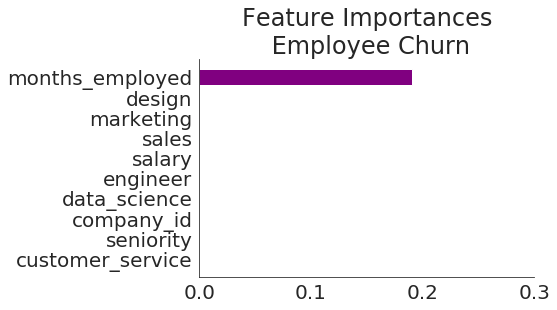

In [502]:
def make_importances_chart(importances, title):
    with sns.axes_style("white", rc={'axes.spines.right': False,
                                     'axes.spines.top': False,
                                     }):
        fig, ax = plt.subplots()
        plt.barh(range(len(importances)),importances.importance.values, color='purple')
        plt.yticks(range(len(importances)), importances.index.values,  fontsize=20)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
        plt.xlim(0,.3)
        plt.title(title, fontsize=24)
        
        plt.show
make_importances_chart(importances,'Feature Importances\n Employee Churn')

In [505]:
importances0 = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_model.feature_importances_,3)})
importances0 = importances0.sort_values('importance',ascending=False).set_index('feature')
importances0

,importance
feature,
months_employed,0.422
salary,0.294
seniority,0.165
company_id,0.094
marketing,0.005
sales,0.005
customer_service,0.004
data_science,0.004
design,0.004
